In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Prepared_data.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6,239.695455
2,24,31.8,16.9,51,0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46,0,6.9,3.3,5.4,223.208333


In [4]:
df.shape

(561, 9)

In [5]:
df.describe()

,PM_2_5
count,561.000000
mean,113.508320
std,84.569505
min,0.000000
25%,47.375000
50%,88.000000
75%,160.000000
max,422.086957


In [6]:
df.columns

Index(['T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'PM_2_5'], dtype='object')

## Index:
* T - Average Temperature(C°)
* TM - Maximum Temperature(C°)
* Tm - Minimum Temperature(C°)
* SLP - Atmospheric presure a sea level(hPa)
* H - Average relative humidity(%)
* PP - Total rainfall and/or snowmelt(mm)
* VV - Average Visibility(Km)
* V - Average wind speed(Km/h)
* VM - Maximum sustained wind speed(Km/n)

In [7]:
df.isna().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM_2_5    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       561 non-null    object 
 1   TM      561 non-null    object 
 2   Tm      561 non-null    object 
 3   H       561 non-null    object 
 4   PP      561 non-null    object 
 5   VV      561 non-null    object 
 6   V       561 non-null    object 
 7   VM      561 non-null    object 
 8   PM_2_5  561 non-null    float64
dtypes: float64(1), object(8)
memory usage: 39.6+ KB


In [9]:
df.rename(columns = {'PM_2_5':'PM 2.5'}, inplace = True)
df.head(1)

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833


In [10]:
# Visualizing PM_2_5

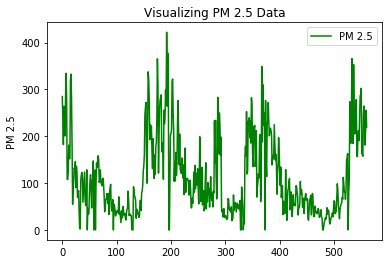

In [11]:
sns.lineplot(data=df['PM 2.5'], color='g',label='PM 2.5')
plt.title('Visualizing PM 2.5 Data')
plt.show()

In [12]:
df['PM 2.5'].value_counts()

0.000000      16
79.000000      3
37.625000      2
80.041667      2
30.666667      2
              ..
28.541667      1
116.458333     1
272.416667     1
97.041667      1
104.608696     1
Name: PM 2.5, Length: 527, dtype: int64

In [13]:
for col in df.columns[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df.dtypes

T         float64
TM        float64
Tm        float64
H         float64
PP        float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

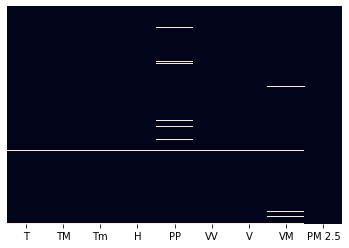

In [15]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

In [16]:
df = df.dropna()

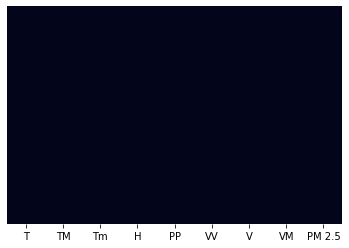

In [17]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

In [18]:
df.shape

(537, 9)

In [19]:
# Drop the column where PM 2.5 = 0
df = df[df['PM 2.5'] != 0.0]

In [20]:
df.head(4)

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286


In [21]:
df.shape

(522, 9)

In [22]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

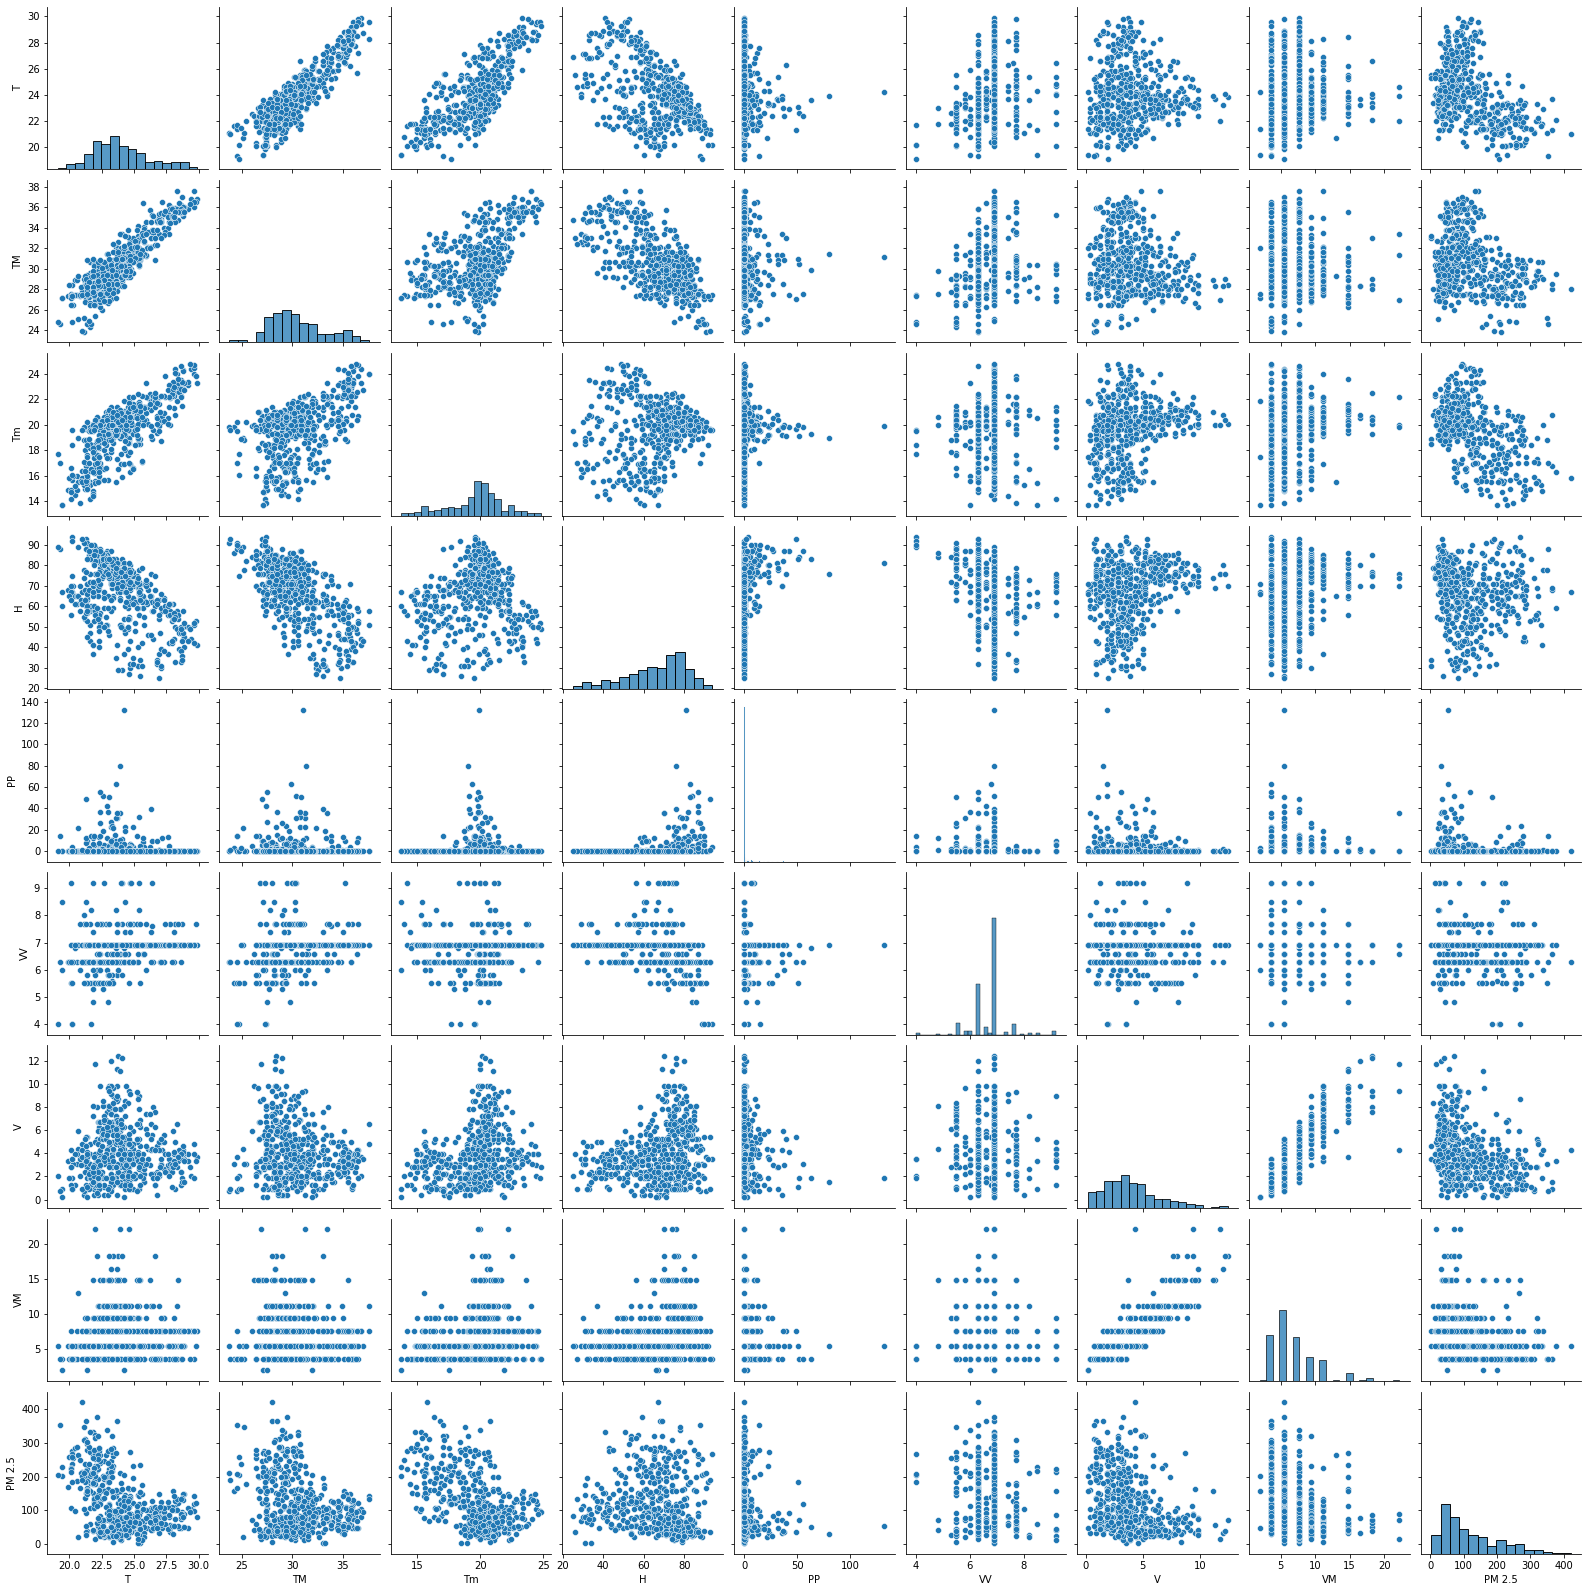

In [23]:
sns.pairplot(df)

Here rows (561-545 = 16 ) where value is zero , so remove it

# Exploratory Data aanalysis

* Fine particular matter (PM 2.5 )  is an air pollution that is concern for people's health when level in air are high , PM 2.5 are tiny particles i tha air that reduce visibility and cause the ait to appear hazy when levels are elevated.

* Outdoor PM 2.5 levels are most likely to be elevated on days with little or no wind or air mixing.

I Will mak a new binary features `Accepetable` , its values wiil be 1 if the PM 2.5 lavel is acceptable and 0 if not

In [24]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)
        
df['Acceptable'] = Acceptable


In [25]:
df.sample(5)

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5,Acceptable
386,22.1,29.4,17.0,59.0,0.00,7.7,3.3,5.4,138.791667,1
116,21.3,27.8,19.8,88.0,7.87,5.5,4.6,7.6,26.833333,1
63,29.6,37.6,24.0,51.0,0.00,6.9,4.8,7.6,142.500000,1
461,23.1,27.4,21.2,83.0,0.00,5.5,8.1,14.8,75.333333,1
387,21.3,28.4,15.6,57.0,0.00,7.7,4.6,7.6,153.083333,0


In [26]:
print(df.Acceptable.value_counts())

1    373
0    149
Name: Acceptable, dtype: int64


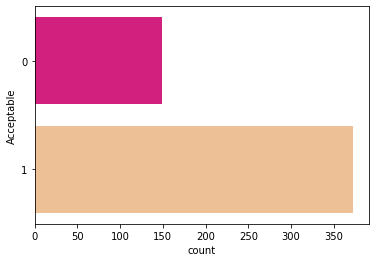

In [27]:
# Vislasualize the Acceptable
sns.countplot(y='Acceptable', data=df, palette = 'Accent_r')
plt.show()

* 389 days had Acceptable PM 2.5 Lavels
* 156 day had Not Acceptable PM 2.5 Levels

# Visualize the Climate Featres Vs Acceptable PM 2.5 levels

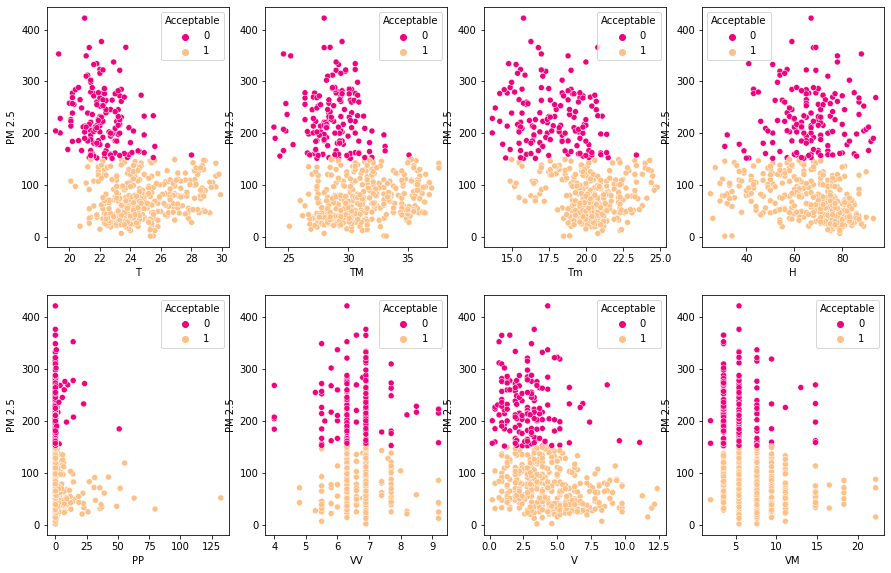

In [28]:
cols =  list(df.columns)

plt.figure(figsize=(15, 15))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "Accent_r")

# Visualize through the heatmap


In [29]:
df.shape

(522, 10)

In [30]:
df.shape

(522, 10)

In [31]:
df.head(1)

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5,Acceptable
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833,0


In [32]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5,Acceptable
T,1.000000,0.886066,0.754669,-0.485987,-0.066337,0.265192,0.037140,0.038449,-0.408419,0.522390
TM,0.886066,1.000000,0.486710,-0.667174,-0.045421,0.263024,-0.134021,-0.089428,-0.251422,0.395557
Tm,0.754669,0.486710,1.000000,0.120643,0.024127,0.034922,0.271600,0.248564,-0.514636,0.550871
H,-0.485987,-0.667174,0.120643,1.000000,0.270014,-0.303661,0.278017,0.257704,-0.128596,0.000190
PP,-0.066337,-0.045421,0.024127,0.270014,1.000000,-0.068208,-0.091420,-0.050060,-0.126596,0.103312
VV,0.265192,0.263024,0.034922,-0.303661,-0.068208,1.000000,-0.008328,-0.041237,-0.119884,0.153655
V,0.037140,-0.134021,0.271600,0.278017,-0.091420,-0.008328,1.000000,0.842111,-0.371244,0.315984
VM,0.038449,-0.089428,0.248564,0.257704,-0.050060,-0.041237,0.842111,1.000000,-0.346540,0.294298
PM 2.5,-0.408419,-0.251422,-0.514636,-0.128596,-0.126596,-0.119884,-0.371244,-0.346540,1.000000,-0.857068
Acceptable,0.522390,0.395557,0.550871,0.000190,0.103312,0.153655,0.315984,0.294298,-0.857068,1.000000


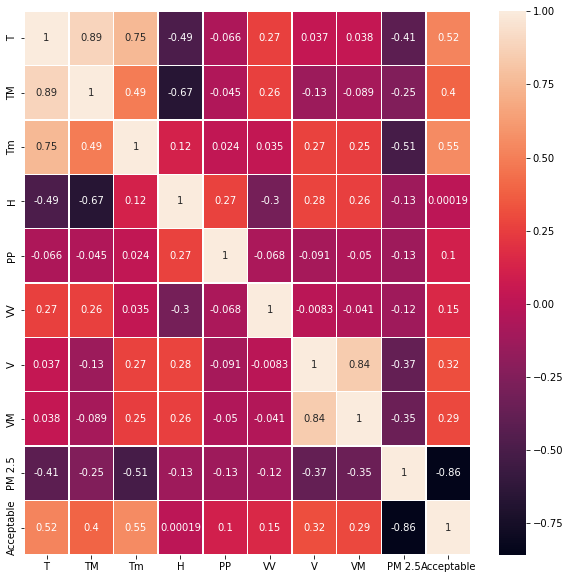

In [33]:
plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df.corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

# Preparing Data for Model Preparation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [36]:
print('Length of x_train: ', len(x_train))
print('Length of x_test: ', len(x_test))
print('Length of y_train: ', len(y_train))
print('Length of y_test: ', len(y_test))

Length of x_train:  417
Length of x_test:  105
Length of y_train:  417
Length of y_test:  105


# KNN regressor

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selector = ExtraTreesRegressor()
feature_selector.fit(x,y)

ExtraTreesRegressor()

In [38]:
feature_selector.feature_importances_

array([0.19179799, 0.10464763, 0.2810589 , 0.08466562, 0.06447991,
       0.06676786, 0.110749  , 0.09583309])

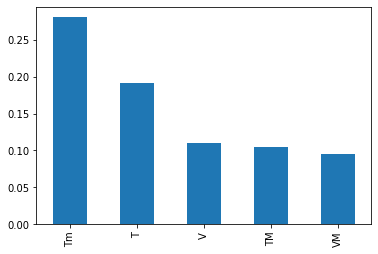

In [39]:
pd.Series(feature_selector.feature_importances_, index=x.columns).nlargest(5).plot(kind='bar')

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [41]:
print(f'Coefficient of determination R^2 on train set {knn.score(x_train, y_train)}')

Coefficient of determination R^2 on train set 1.0


In [42]:
print(f'Coefficient of determination R^2 on test set {knn.score(x_test, y_test)}')

Coefficient of determination R^2 on test set 0.10509056953821472


## Model overfit

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
score = cross_val_score(knn, x, y, cv = 3)

In [45]:
score.mean()

-0.09121259776941071

In [46]:
pred = knn.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


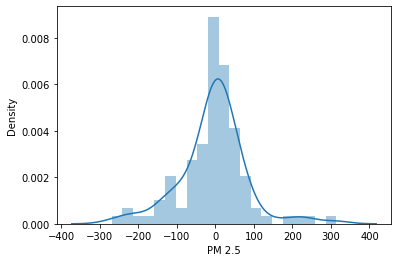

In [47]:
sns.distplot(y_test - pred)
plt.show()

# Hyper-parameter Tuning

In [48]:
scores = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
    scores.append(score.mean())

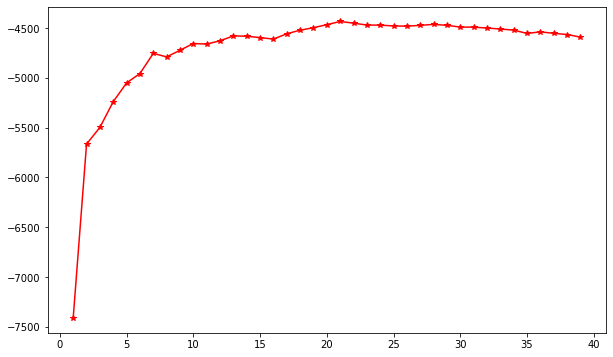

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), scores,marker='*',color='r')

In [50]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [51]:
cross_val_score(knn, x, y, cv = 3).mean()

0.29076617975303004

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


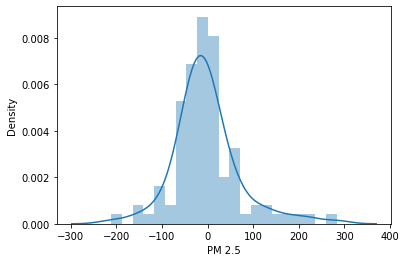

In [52]:
pred = knn.predict(x_test)
sns.distplot(y_test-pred)

In [53]:
from sklearn import metrics

In [54]:
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 50.063401401801706
Mean Sq Error: 5275.166031327204
Root Mean Error: 72.63033822946996


# XGBBOOST-Regressor

In [55]:
from xgboost import XGBRegressor

In [56]:
xgb = XGBRegressor()

In [57]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
print(f'Coefficient of determination R^2 on train set {xgb.score(x_train, y_train)}')

Coefficient of determination R^2 on train set 0.9998297095194079


In [59]:
print(f'Coefficient of determination R^2 on test set {xgb.score(x_test, y_test)}')

Coefficient of determination R^2 on test set 0.3229954425355015


## Overfit Model

In [60]:
score = cross_val_score(xgb, x, y, cv = 3)

In [61]:
score.mean()

0.17566861769257994

In [62]:
y_pred = xgb.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


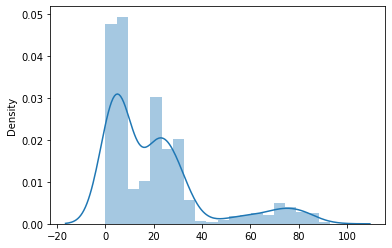

In [63]:
sns.distplot(x_test)

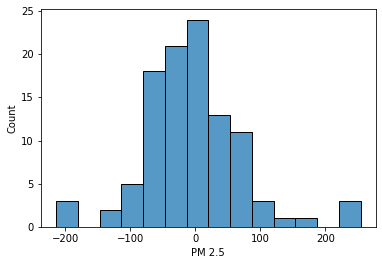

In [64]:
sns.histplot(y_test-y_pred)

# Hyper-Parameter Tuning

In [65]:
import numpy as np

In [66]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=12)]
learning_rate = [0.05,0.1,0.2,0.3,0.4,0.5,0.6]
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
subsample = [0.7,0.6,0.8]
min_child_weight = list(range(3,8))
objective = ['reg:squarederror']

In [67]:
param = {
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight,
    'objective':objective
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
search = RandomizedSearchCV(xgb, param, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=100, random_state=43, n_jobs=-1, verbose=True)

In [70]:
search.fit(x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          verbosity=None),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learn

In [71]:
search.best_params_

{'subsample': 0.8,
 'objective': 'reg:squarederror',
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': 0.05}

In [72]:
search.best_score_

-5025.383825623392

In [73]:
pred = search.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


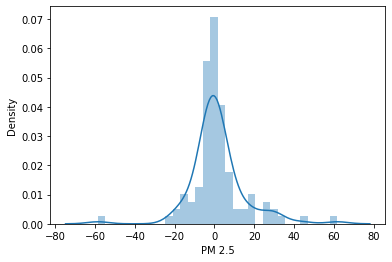

In [74]:
sns.distplot(y_test-pred)

In [75]:
from sklearn import metrics

In [76]:
print(f"Mean Abs Error(MAE): {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error(MSE): {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error(RME): {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error(MAE): 8.352564576539828
Mean Sq Error(MSE): 191.5781128020003
Root Mean Error(RME): 13.841174545608487


In [77]:
search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=20,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
import pickle

In [79]:
pickle.dump(search,open('xgb_boost.pkl','wb'))